# Rozkłady prawdopodobieństwa, a testowanie hipotez

Aby zilustrować związek pomiędzy <b> rozkładami prawdopodobieństwa</b>, a <b> testowaniem hipotez </b>, rozważmy następujący problem:

<ul>
<li> Średnia masa noworodków w USA wynosi $3.5$ kg, przy odchyleniu standardowym $0.76$ kg. 
<li> Załóżmy, że chcemy znaleźć wszystkie dzieci znacznie różniące się od normy (aby móc monitorować ich rozwój). 
<li> Co zrobić z dzieckiem, które urodziło się z wagą $2.6$ kg?
<li> Możemy wypowiedzieć ten problem w formie testu hipotez:  
<ul>
<li> nasza hipoteza mówi, że dziecko pochodzi z populacji ``zdrowych'' niemowląt. </li>
<li> czy możemy odrzucić hipotezę, czy też ciężar dziecka sugeruje, że nie ma podstaw do odrzucenia takiej hipotezy?</li>
</ul>
</ul>

Aby odpowiedzieć na to pytanie, możemy postępować w następujący sposób:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Zdefiniujmy zmienną losową o rozkładzie Normalnym z parametrami $\mu=3.5$, $\sigma=0.76$

In [12]:
md, sd = 3.5, 0.76
nd = stats.norm(md, sd)

Znajdź dystrybuantę (CDF) tej zmiennej losowej  oraz wyznacz $CDF(2.6)$.

Innymi słowy, prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg lżejsze od przeciętnego dziecka:
$$
P(X<2.6)=CDF(2,6)=0.118.
$$

In [13]:
# Shade the regions beyond a certain "checkVal"
checkVal = 2.6
p = nd.cdf(checkVal)
print('p = {0:5.3f}'.format(nd.cdf(checkVal)))

# standaryzacja (zamiana X na Z):
# Z = (X - mi)/sigma < (2.6-3.5) / 0.76 = -0.118

p = 0.118


# Zadanie 1
Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

pole = p-value = 0.1182


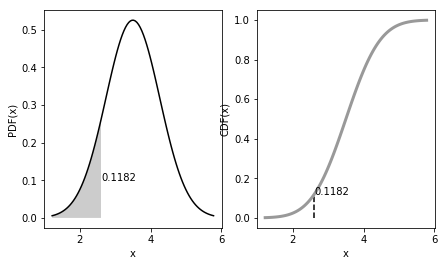

In [4]:
x0=nd.cdf(checkVal)

(inte,err)=integrate.quad(lambda x: nd.pdf(x), -np.inf, checkVal)
print('pole = p-value =', np.round(inte,4))

# twierdzenie o 3 sigmach
x = np.linspace(md-3*sd,md+3*sd,100)
#  gęstość
yp = nd.pdf(x)
# dystrybuanta
y = nd.cdf(x)
#x1 = np.linspace(-3, x0)
x1 = np.linspace(md-3*sd, checkVal)
y1 = nd.pdf(x1)
# print('(x1, y1) = ',x1, y1)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(checkVal, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.cdf(checkVal),4))
plt.vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
plt.show()

In [14]:
p < 0.05
# Zatem dziecko o wadze 2.6 kg pochodzi z populacji dzieci zdrowych. Nie ma podstaw do odrzucenia hipotezy H0.

False

# Zadanie 2
My zakładamy, że zjawisko to jest modelowane rozkładem normalny więc prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg cięższe od przeciętnego dziecka, wynosi również $11.8\%$.

Jeśli dziecko jest zdrowe, to prawdopodobieństwo, że jego masa odbiega o co najmniej $0.9$ kg od średniej wynosi $2 \cdot 11,8\% = 23,6\%=0.236$. (bo może odbiegać w górę lub w dół)

To nie jest znaczące, więc nie mamy wystarczających dowodów na odrzucenie naszej hipotezy, a nasze dziecko uważa się za zdrowe.

Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

0.1182


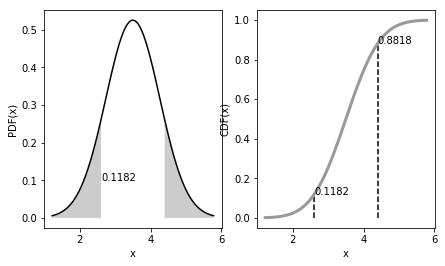

0.23632973631439835


In [15]:
checkVal = 2.6
x0=nd.cdf(checkVal)

(inte,err)=integrate.quad(lambda x: nd.pdf(x), -np.inf, checkVal)
print(np.round(inte,4))

x = np.linspace(md-3*sd,md+3*sd,100)
yp = nd.pdf(x)
y = nd.cdf(x)
#x1 = np.linspace(-3, x0)
x1 = np.linspace(md-3*sd, checkVal)
y1 = nd.pdf(x1)
x2 = np.linspace(md+ (md-checkVal), md+3*sd)
y2 = nd.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(checkVal, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.cdf(checkVal),4))
axs[1].vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
axs[1].vlines(md+ (md-checkVal), 0, nd.cdf(md+ (md-checkVal)), linestyles='--')
axs[1].text(md+ (md-checkVal), nd.cdf(md+ (md-checkVal)), np.round(nd.cdf(md+ (md-checkVal)),4))
plt.show()
print(2*x0)

# Zadanie 3
Czy w powyzszych rozwiązaniach można użyć funkcji <tt>nd.sf</tt>?

$$
SF(x)=1-CDF(x).
$$

Jeżeli tak to zrób to.

In [16]:
sf = nd.sf(checkVal)
sf

0.8818351318428008

In [17]:
cdf = nd.cdf(checkVal)
1 - cdf

0.8818351318428008

In [18]:
sf == 1 - cdf

True

In [19]:
# inny zapis 1 - cdf?
nd.cdf(md+ (md-checkVal))

0.8818351318428008

In [ ]:
# Tak, można użyć